<a href="https://colab.research.google.com/github/valentinwerner1/UniversityProjects/blob/main/TWSM/Homework/VW_3_Exercise_Representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import pandas as pd 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import Binarizer
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# #Load stemmed data as .pkl
with open("/content/drive/MyDrive/data_stem.pkl", 'rb') as f:
    data_stem = pickle.load(f)

In [ ]:
data_stem[0]

'car wonder enlighten car saw dai door sport car look late earli call bricklin door small addit bumper separ rest bodi know tellm model engin spec year product car histori info funki look car mail thank'

# Step 3: Bag-of-words (sklearn)

In [ ]:
absolute_vect = CountVectorizer(max_df = 0.95, min_df = 0.01)
absolute = absolute_vect.fit_transform(data_stem)
relative_vect = TfidfVectorizer(max_df = 0.95, min_df = 0.01, use_idf = False, norm = "l1")
relative = relative_vect.fit_transform(data_stem)
idf_vect = TfidfVectorizer(max_df = 0.95, min_df = 0.01, smooth_idf = False)
idf = idf_vect.fit_transform(data_stem)
OHE_vect = Binarizer().fit_transform(absolute)
#changing min and max will result in a longer or shorter resulting matrix. 
#e.g., max = 0.95&min =0.01 == 1621 each and max = 0.95&min =0.05 == 240 each

In [ ]:
 len(absolute_vect.get_feature_names_out()),  len(relative_vect.get_feature_names_out()),  len(idf_vect.get_feature_names_out())

(1621, 1621, 1621)

In [ ]:
words = []
for i in [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.53]: 
  #0.53 was chosen as it is the lowest number between 0.95 and 0.54 that changes the number of words
  count_vect = CountVectorizer(max_df = 0.95, min_df = i)
  counts = count_vect.fit_transform(data_stem)
  words.append([i, len(count_vect.get_feature_names_out())])

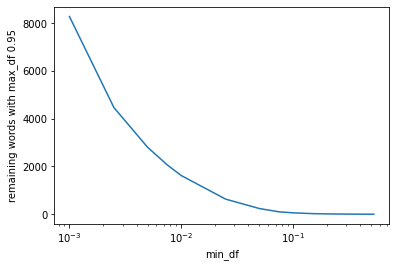

In [ ]:
sns.lineplot(x = [item[0] for item in words], y = [item[1] for item in words])
plt.xlabel("min_df")
plt.ylabel("remaining words with max_df 0.95")
plt.xscale("log")
#we can see that by changing the min number reduced very quickly by changing the min_df 
#and is also quickly reaching less than 100 words at min_df ~ 0.075
#repeating the same for max_df makes little sense, since everything over 0.54 only allows one more word

In [ ]:
with np.printoptions(threshold=np.inf):
    #the OHE will indepent of the number of occurence return 0 or 1 based on
    #the word being in the text or not
    #this somewhat accounts for the lengths of the text, but ignores the 
    #frequency of all words, in result estimation might get harder
    print("OHE: ", OHE_vect.toarray()[0][:25])
    #absolute will count the absolute number of occurences in the text
    #this is good because it also evaluates how often the word occurs in a string
    #this is bad because it does not account for the length of a text
    print("absolute: ", absolute.toarray()[0][:25])
    #relative will divide absolute count by length of the text
    #this is good because it makes different strings comparrable
    print("relative: ", relative.toarray()[0][:25])
    #idf will not only account for the relative frequency but also weighs words
    #some words are used very frequent and are thus meaningsless in classifying texts
    #therefore, we adjust the relative frequency in one text 
    #with the frequency of the word in all texts in the list
    print("idf: ", idf.toarray()[0][:25])

OHE:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
absolute:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
relative:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03225806 0.         0.
 0.        ]
idf:  [0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.1521488 0.        0.        0.       ]


In [ ]:
df = pd.DataFrame(absolute_vect.get_feature_names_out(), columns = ["keys"])
df["counts"] = absolute.toarray()[0]
df["relative"] = relative.toarray()[0]
df["IDF"] = idf.toarray()[0]
df["OHE"] = OHE_vect.toarray()[0]
first_doc = df[df["counts"] != 0]
first_doc.head()

,keys,counts,relative,IDF,OHE
21,addit,1,0.032258,0.152149,1
165,bodi,1,0.032258,0.151966,1
204,call,1,0.032258,0.114534,1
213,car,5,0.161290,0.654135,1
366,dai,1,0.032258,0.107709,1


In [ ]:
data_stem[0]

'car wonder enlighten car saw dai door sport car look late earli call bricklin door small addit bumper separ rest bodi know tellm model engin spec year product car histori info funki look car mail thank'

In [ ]:
first_doc.sort_values("IDF", ascending = False).head()

,keys,counts,relative,IDF,OHE
213,car,5,0.161290,0.654135,1
440,door,2,0.064516,0.341329,1
1368,spec,1,0.032258,0.182100,1
858,look,2,0.064516,0.181955,1
1377,sport,1,0.032258,0.170508,1


In [ ]:
first_doc.sort_values("counts", ascending = False).head()
#we can see one 3 out of 5 words remain in the top5 frequencies but their order is changing.
#it is also visible that the IDF score is way more nuanced compared to the absolute counts.

,keys,counts,relative,IDF,OHE
213,car,5,0.161290,0.654135,1
858,look,2,0.064516,0.181955,1
440,door,2,0.064516,0.341329,1
934,model,1,0.032258,0.147917,1
1600,wonder,1,0.032258,0.130580,1


# Step 4: Bag-of-words with gensim

In [ ]:
corpus_gen=[doc.split() for doc in data_stem]
#every document is split into its individual words and added to a list
#corpus_gen is a list of every word in the stemmed data collection (incl duplicate)
len(corpus_gen)

11314

In [ ]:
id2word = Dictionary(corpus_gen) #generate dictionary (list of words existing in this corpus)
id2word.filter_extremes(no_below=566, no_above=0.95) #reduces from 72246 to 240
#no below = only keep numbers that appear at least this often
#no above = dont keep words that appear in more than this fraction of documents
#keep n = after no below and above is applied, only keeps the first n words

In [ ]:
print(id2word.token2id) #return each word and its ID 
print(id2word.token2id.keys()) #returns the keys of the dictionary (list of all words)
print(id2word.dfs) #frequency in which the words occur along all texts

{'call': 0, 'car': 1, 'dai': 2, 'engin': 3, 'info': 4, 'know': 5, 'look': 6, 'mail': 7, 'small': 8, 'thank': 9, 'wonder': 10, 'year': 11, 'answer': 12, 'base': 13, 'card': 14, 'edu': 15, 'experi': 16, 'final': 17, 'gui': 18, 'messag': 19, 'number': 20, 'report': 21, 'send': 22, 'actual': 23, 'advanc': 24, 'anybodi': 25, 'better': 26, 'bit': 27, 'email': 28, 'expect': 29, 'feel': 30, 'good': 31, 'got': 32, 'great': 33, 'heard': 34, 'help': 35, 'life': 36, 'like': 37, 'line': 38, 'machin': 39, 'mayb': 40, 'new': 41, 'opinion': 42, 'peopl': 43, 'plai': 44, 'post': 45, 'price': 46, 'probabl': 47, 'question': 48, 'read': 49, 'real': 50, 'recent': 51, 'start': 52, 'take': 53, 'time': 54, 'us': 55, 'wai': 56, 'address': 57, 'articl': 58, 'chip': 59, 'com': 60, 'far': 61, 'inform': 62, 'person': 63, 'phone': 64, 'point': 65, 'pretti': 66, 'requir': 67, 'stuff': 68, 'system': 69, 'thing': 70, 'write': 71, 'wrote': 72, 'check': 73, 'mean': 74, 'possibl': 75, 'right': 76, 'set': 77, 'softwar': 78

In [ ]:
corpus1=[id2word.doc2bow(doc) for doc in corpus_gen] #return a list of the IDs and frequency for every doc
corpus2=[[(token[0],(token[1]/sum(n for _, n in doc))) for token in doc] for doc in corpus1] #return a list of the IDs and relative frequency for every doc
corpus3=[[(token[0],1) for token in doc] for doc in corpus1] #return a list of the IDs and occurence for every doc
tfidf=TfidfModel(dictionary=id2word, normalize=True)
corpus4=[tfidf[id2word.doc2bow(doc)] for doc in corpus_gen] #return a list of the IDs and their IDFs for every doc

In [ ]:
df_dict = pd.DataFrame(list(id2word.token2id.keys())[:len(np.transpose(corpus1[0])[0])], columns = ["keys"])
df_dict["absolute_dict"] = np.transpose(corpus1[0])[1]
df_dict["relative_dict"] = np.transpose(corpus2[0])[1]
df_dict["OHE_dict"] = np.transpose(corpus3[0])[1]
df_dict["IDF_dict"] = np.transpose(corpus4[0])[1]
first_doc.merge(df_dict, how = "left", on = "keys") #the difference comes from changing upper and lower bounds on the data frames
#by setting 0.01 as lower bound, there will be more words remaining in the text and in result also different relative
#frequencies and IDF. This is also notable in the NaN values.

,keys,counts,relative,IDF,OHE,absolute_dict,relative_dict,OHE_dict,IDF_dict
0,addit,1,0.032258,0.152149,1,NaN,NaN,NaN,NaN
1,bodi,1,0.032258,0.151966,1,NaN,NaN,NaN,NaN
2,call,1,0.032258,0.114534,1,1.0,0.058824,1.0,0.143930
3,car,5,0.161290,0.654135,1,5.0,0.294118,1.0,0.866231
4,dai,1,0.032258,0.107709,1,1.0,0.058824,1.0,0.131648
5,door,2,0.064516,0.341329,1,NaN,NaN,NaN,NaN
6,earli,1,0.032258,0.152705,1,NaN,NaN,NaN,NaN
7,engin,1,0.032258,0.132140,1,1.0,0.058824,1.0,0.175609
8,histori,1,0.032258,0.149327,1,NaN,NaN,NaN,NaN
9,info,1,0.032258,0.133133,1,1.0,0.058824,1.0,0.177395


# Step 5 : Ngrams

In [ ]:
ngrams_vect = CountVectorizer(ngram_range=(2, 2), max_df=0.95, min_df=0.05)
#returns (only) bigrams of the text  
#tuning max_df and min_df will result in more or less bigrams (like above)
#the bigrams which are returned are existing in at least min_df of the documents
ngrams = ngrams_vect.fit_transform(data_stem)
ngrams_vect.get_feature_names_out()

array(['articl apr', 'edu write', 'write articl'], dtype=object)

In [ ]:
ngram_df = pd.DataFrame(ngrams.toarray(), columns=ngrams_vect.get_feature_names_out())
ngram_df.head()

,articl apr,edu write,write articl
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,1
4,0,0,0


In [ ]:
ngram_df.describe()
#the max occurences are really low. This makes sense as the combination of two words being used in a text is rare.
#this max value would probably be even lower if not applied on a stemmed text.

,articl apr,edu write,write articl
count,11314.000000,11314.000000,11314.000000
mean,0.206558,0.053120,0.124890
std,0.469928,0.230119,0.400271
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,4.000000,2.000000,4.000000
